In [1]:
# loading library
from google.cloud import bigquery
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the data from BigQuery

project_id = "ecstatic-elf-481522-i9"
client = bigquery.Client(project=project_id)

query = """
SELECT
    Time,
    V1, V2, V3, V4, V5, V6, V7, V8, V9, V10,
    V11, V12, V13, V14, V15, V16, V17, V18,
    V19, V20, V21, V22, V23, V24, V25, V26,
    V27, V28,
    Amount,
    Class
FROM `ecstatic-elf-481522-i9.fraud_data.credit_card_transactions`
"""

df = client.query(query).to_dataframe()

print("Shape:", df.shape)
df.head()

Shape: (193670, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,63401.0,1.082874,0.176748,1.491675,2.666308,-0.654596,0.605123,-0.666474,0.328933,0.178518,...,-0.064568,-0.018250,0.079978,0.044460,0.209370,-0.011420,0.056437,0.031140,0.0,0
1,63411.0,-1.808226,1.390167,0.266081,0.518695,-0.209067,-0.165734,-0.218656,0.765490,-0.752461,...,0.200491,0.538654,-0.296581,0.110225,-0.321470,0.533114,-1.076942,-0.595472,0.0,0
2,63573.0,1.213740,-0.387834,1.053145,-0.033415,-1.032340,0.038620,-0.836410,0.233345,0.908503,...,-0.097316,-0.118891,0.019575,0.081908,0.117328,0.994845,-0.039011,0.000699,0.0,0
3,63590.0,-3.779876,-1.906684,0.849758,3.788975,2.166087,-1.270688,-0.657516,0.274214,-1.293508,...,-0.205641,0.029546,0.295243,-0.024642,0.707250,0.435076,0.125716,-0.279834,0.0,0
4,63647.0,-0.213737,0.726661,1.572802,-0.051265,-0.352745,-0.791121,0.457399,-0.020552,-0.392846,...,-0.062212,-0.165147,0.104641,0.644719,-0.876068,0.908815,0.079425,0.136631,0.0,0


### Data Overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193670 entries, 0 to 193669
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    193670 non-null  float64
 1   V1      193670 non-null  float64
 2   V2      193670 non-null  float64
 3   V3      193670 non-null  float64
 4   V4      193670 non-null  float64
 5   V5      193670 non-null  float64
 6   V6      193670 non-null  float64
 7   V7      193670 non-null  float64
 8   V8      193670 non-null  float64
 9   V9      193670 non-null  float64
 10  V10     193670 non-null  float64
 11  V11     193670 non-null  float64
 12  V12     193670 non-null  float64
 13  V13     193670 non-null  float64
 14  V14     193670 non-null  float64
 15  V15     193670 non-null  float64
 16  V16     193670 non-null  float64
 17  V17     193670 non-null  float64
 18  V18     193670 non-null  float64
 19  V19     193670 non-null  float64
 20  V20     193670 non-null  float64
 21  V21     19

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,193670.000000,193670.000000,193670.000000,193670.000000,193670.000000,193670.000000,193670.000000,193670.000000,193670.000000,193670.000000,...,193670.000000,193670.000000,193670.000000,193670.000000,193670.000000,193670.000000,193670.000000,193670.000000,193670.000000,193670.0
mean,120510.566675,0.123147,0.019429,-0.319843,-0.075753,0.131082,-0.044833,0.050362,-0.025399,0.015337,...,0.014122,0.050541,0.017614,-0.004559,-0.062304,-0.012761,-0.000556,-0.001161,83.424114,0.00173
std,33603.422100,1.987779,1.646360,1.488697,1.437364,1.366131,1.343304,1.239912,1.184434,1.085708,...,0.737466,0.759363,0.622803,0.610805,0.543973,0.474942,0.410126,0.332326,241.068098,0.041554
min,47826.000000,-46.855047,-60.464618,-48.325589,-5.683171,-113.743307,-21.929312,-43.557242,-50.943369,-13.434066,...,-22.889347,-9.499423,-44.807735,-2.807897,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,83209.000000,-0.866201,-0.595442,-1.263308,-0.899245,-0.571133,-0.819096,-0.526180,-0.239482,-0.615818,...,-0.230932,-0.549880,-0.151852,-0.369400,-0.383456,-0.328334,-0.072849,-0.058938,4.990000,0.0
50%,127770.500000,0.064599,0.062409,-0.274666,-0.134972,0.087358,-0.332710,0.092562,-0.004691,-0.026284,...,-0.010102,0.072211,0.011036,0.030397,-0.086974,-0.042670,-0.002546,-0.005650,20.000000,0.0
75%,148786.750000,1.868588,0.835470,0.712997,0.584682,0.751880,0.346469,0.642308,0.311428,0.603410,...,0.213792,0.638916,0.182148,0.476703,0.301656,0.219671,0.096038,0.079474,71.727500,0.0
max,172792.000000,2.454930,22.057729,9.382558,16.875344,32.911462,73.301626,120.589494,12.766112,15.594995,...,27.202839,8.361985,22.528412,4.584549,7.519589,3.415636,31.612198,22.620072,25691.160000,1.0


In [5]:
# check for null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### EDA 

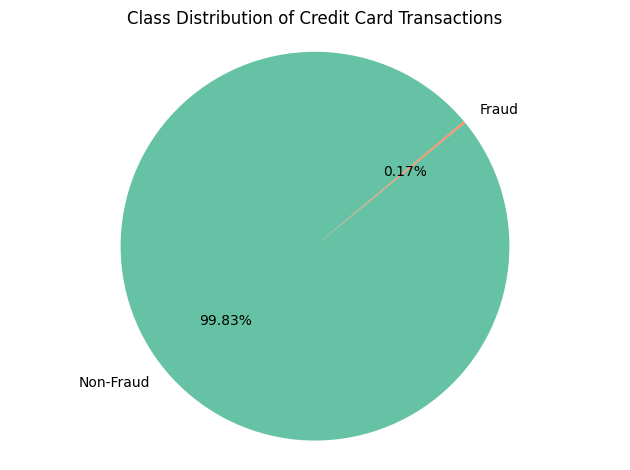

In [6]:
# target variable distribution

counts = df['Class'].value_counts().sort_index()
class_labels = ['Non-Fraud' if int(c) == 0 else 'Fraud' for c in counts.index]

plt.pie(counts, labels=class_labels, autopct='%1.2f%%', startangle=40, colors=plt.cm.Set2.colors)
plt.title('Class Distribution of Credit Card Transactions')
plt.axis('equal')

plt.tight_layout()
plt.show()

**It can be observed that there is severe class imbalance in dataset, which is natural, however, it needs to be adjusted for modeling.**

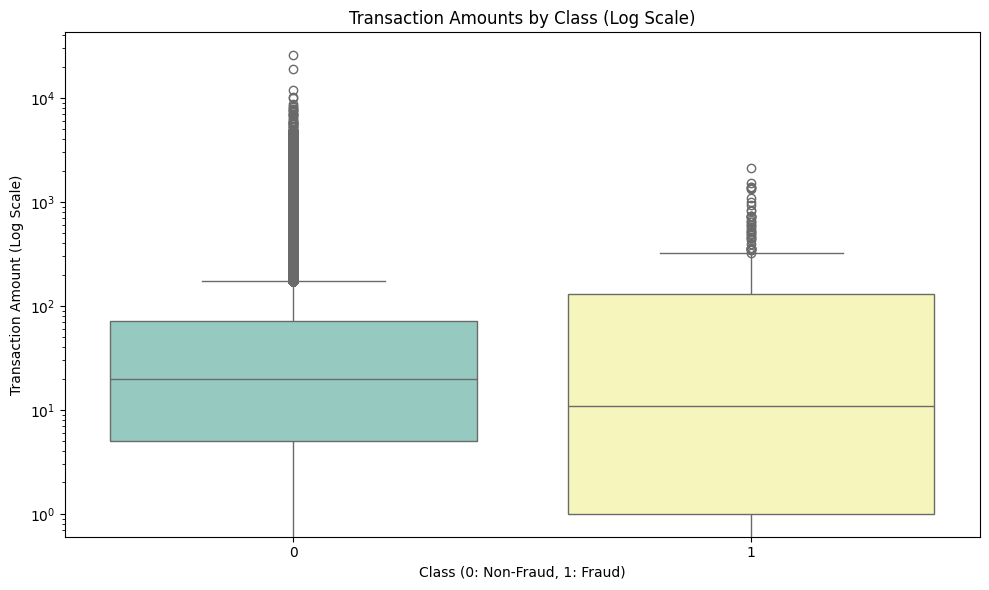

In [7]:
# comparing transaction amounts
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=df, hue='Class', palette='Set3', legend=False)
plt.yscale('log')
plt.title('Transaction Amounts by Class (Log Scale)')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Transaction Amount (Log Scale)')
plt.tight_layout()
plt.show()

**Fraudulent transactions show a wider range of values but lower typical amounts compared to legitimate ones. While legitimate users make much larger purchases, attackers often stick to smaller, more varied sums to avoid detection. This suggests that transaction size alone isn't a definitive indicator of fraud.**

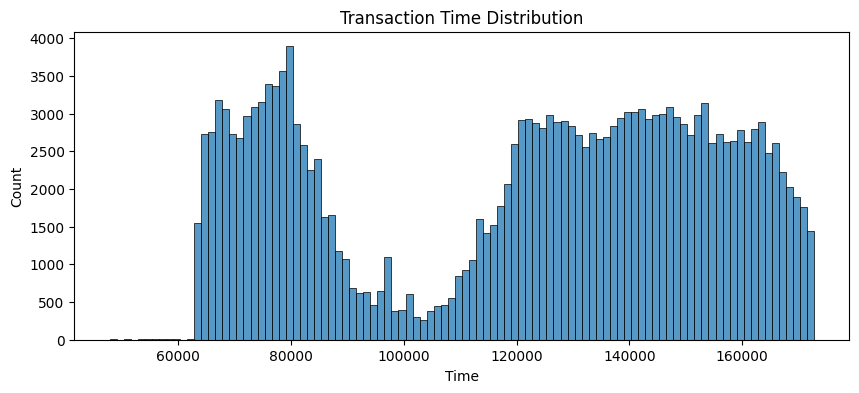

In [8]:
# time distribution of transactions
plt.figure(figsize=(10,4))
sns.histplot(df['Time'], bins=100)
plt.title("Transaction Time Distribution")
plt.show()

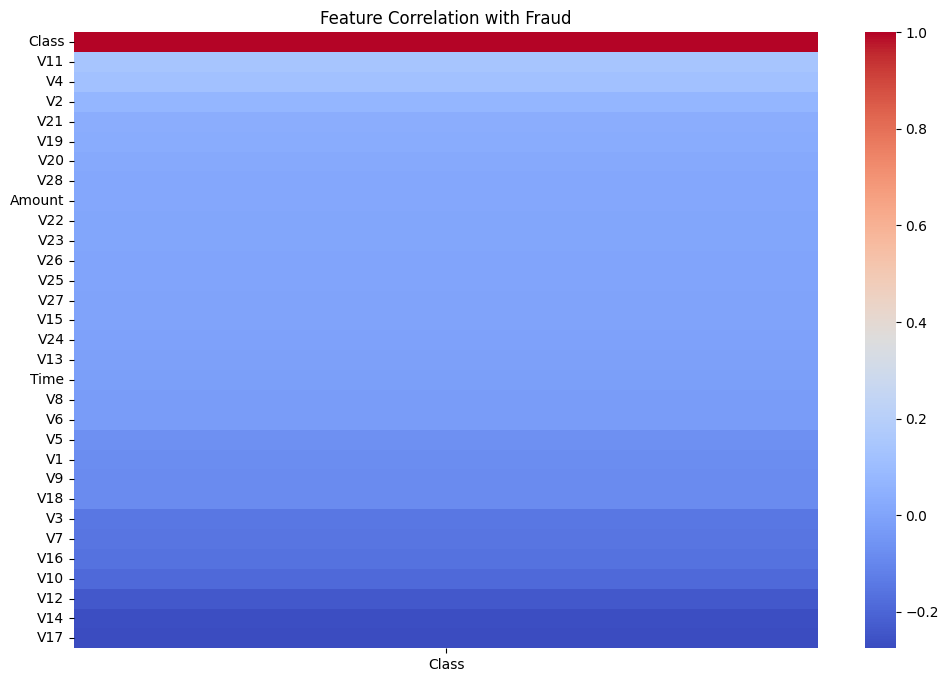

In [9]:
# correlation Analysis

corr = df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr[['Class']].sort_values(by='Class', ascending=False),
            annot=False, cmap='coolwarm')
plt.title("Feature Correlation with Fraud")
plt.show()


#### Feature Engineering

**Seconds are converted into a 24-hour format to transform raw timestamps into a cyclical feature, allowing the model to detect fraud patterns based on the time of day.**

In [10]:
df['hour'] = (df['Time'] // 3600).astype(int)
df['hour_of_day'] = df['hour'] % 24
df['hour_of_day'].unique()

array([17, 18, 19, 20, 21, 22, 23,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12, 13, 14, 15, 16])

In [12]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,hour,hour_of_day
193665,65385.0,-2.923827,1.524837,-3.018758,3.289291,-5.755542,2.218276,-0.509995,-3.569444,-1.016592,...,-4.288639,0.563797,-0.949451,-0.204532,1.510206,-0.324706,1354.25,1,18,18
193666,59011.0,-2.326922,-3.348439,-3.513408,3.175060,-2.815137,-0.203363,-0.892144,0.333226,-0.802005,...,-1.478490,-0.061553,0.236155,0.531911,0.302324,0.536375,1389.56,1,16,16
193667,62467.0,-5.344665,-0.285760,-3.835616,5.337048,-7.609909,3.874668,1.289630,0.201742,-3.003532,...,-1.016579,-0.071361,-0.335869,0.441044,1.520613,-1.115937,1402.16,1,17,17
193668,154278.0,-1.600211,-3.488130,-6.459303,3.246816,-1.614608,-1.260375,0.288223,-0.048964,-0.734975,...,-1.463421,-0.624231,-0.176462,0.400348,0.152947,0.477775,1504.93,1,42,18
193669,122608.0,-2.003460,-7.159042,-4.050976,1.309580,-2.058102,-0.098621,2.880083,-0.727484,1.460381,...,-1.800985,0.657586,-0.435617,-0.894509,-0.397557,0.314262,2125.87,1,34,10


In [13]:
# save the processed data to a CSV file without Time and hour columns
df_to_save = df.drop(columns=['Time', 'hour'], errors='ignore')
df_to_save.to_csv('../data/processed_credit_card_transactions.csv', index=False)